In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cardiotocographic.csv")

In [5]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
df.shape

(2126, 14)

# 1.	Data Cleaning and Preparation:

In [7]:
duplicate=df.duplicated()

In [8]:
duplicate.any() # we have duplicates in our data lets drop them

True

In [9]:

duplicate_rows = df[duplicate]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
         LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0  


In [10]:
# Remove all duplicates (including the first occurrence)
df_no_duplicates = df.drop_duplicates(keep=False)
print("\nDataFrame after removing all duplicates:")
print(df_no_duplicates)


DataFrame after removing all duplicates:
              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency 

In [11]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
print(df.isnull().values.sum())

167


<Axes: >

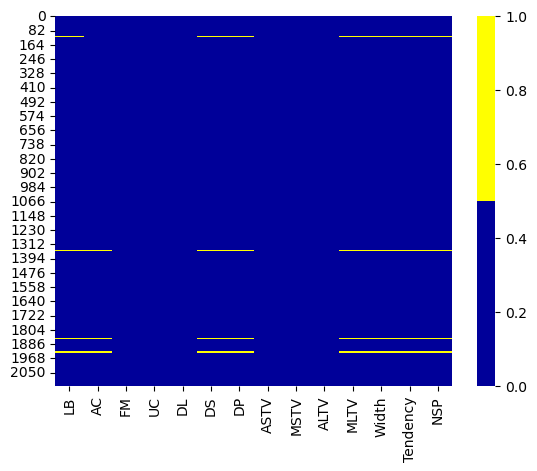

In [13]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(df.isnull(),
           cmap = sns.color_palette(colours))

# understanding the pattern of missing values

In [14]:
# Handling missing values with mean imputation

df1 = df.fillna(df.mean())


In [15]:
df1.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [16]:
df1.dtypes

# Here we do not need any data type conversion

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
# Detect and treat outliers if necessary.


df1.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

<Axes: >

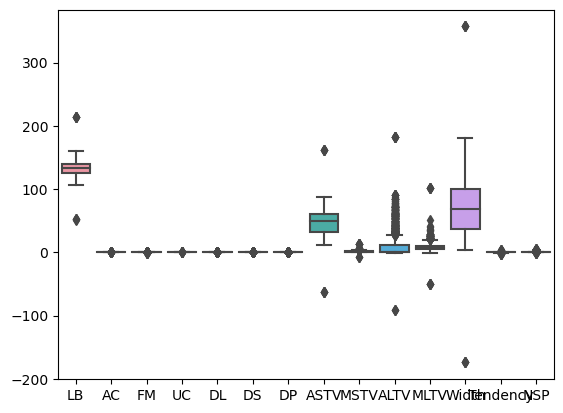

In [18]:
sns.boxplot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1634424b590>,
 'caps': [<matplotlib.lines.Line2D at 0x16344268410>,
 'boxes': [<matplotlib.lines.Line2D at 0x16344256990>],
 'medians': [<matplotlib.lines.Line2D at 0x16344269650>],
 'fliers': [<matplotlib.lines.Line2D at 0x16344257f10>],
 'means': []}

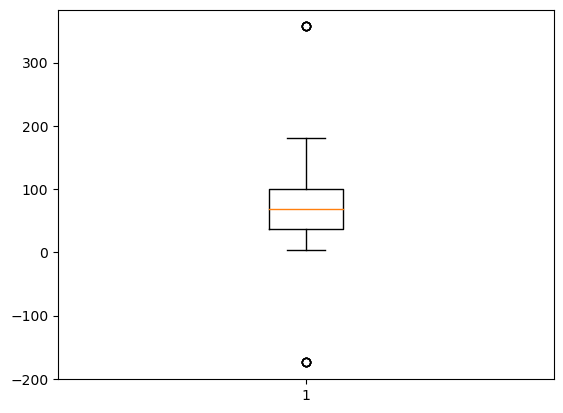

In [19]:
df2 = df1['Width']

plt.boxplot(df2)

# detecting outliers in Width column

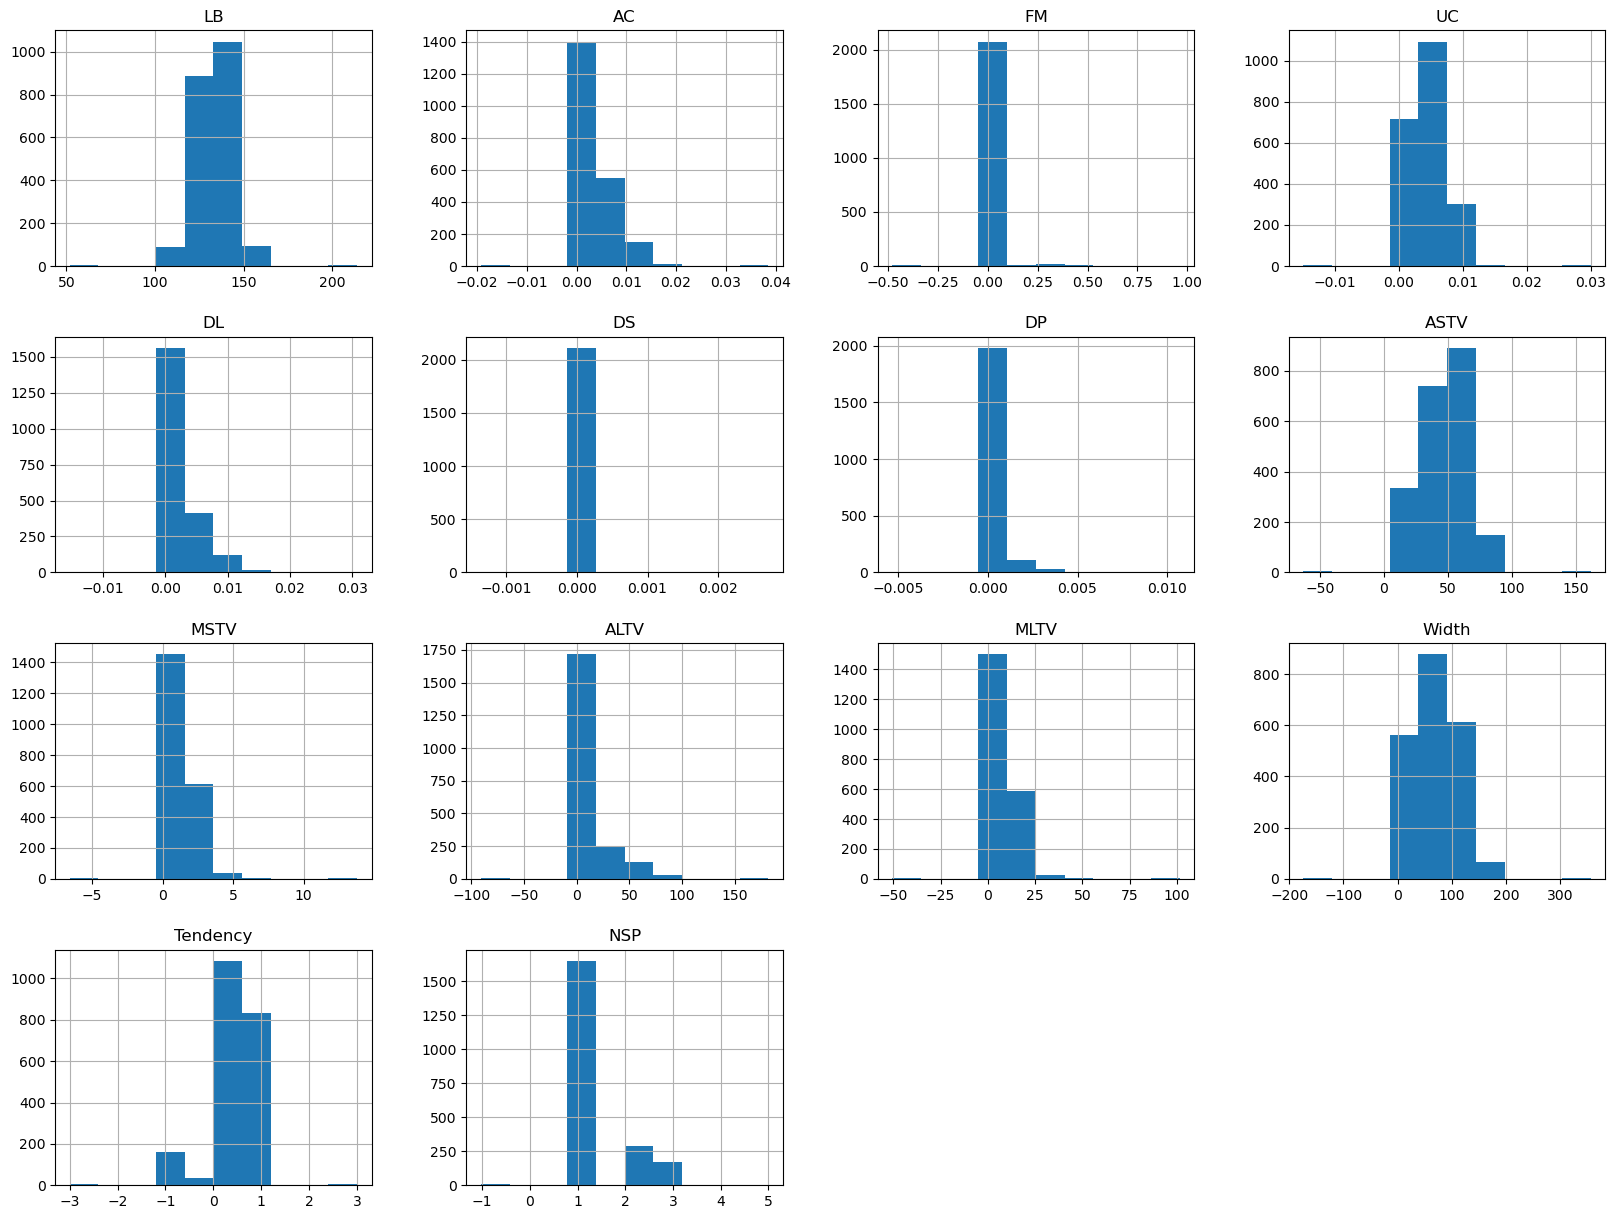

In [20]:
#df1['LB'].hist()

df1.hist(figsize = (20, 15))  #histogram for every column seperately


plt.show()

In [21]:
## Above we used data visualization technique to look out for outlier

In [22]:
# lets identify the exact value of outliers using IQR Method

In [23]:
df3= df1['ALTV']

In [24]:
df3.head(10)

0    43.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     6.0
8     5.0
9     6.0
Name: ALTV, dtype: float64

# IQR 


In [25]:
df1.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [26]:
#Finding outliers for ALTV column

#numpy library is used for this

Q1 = df3.quantile(0.25)   # we get 25th percentile
Q3 = df3.quantile(0.75)   # we get 75th percentile
Q1 , Q3

(0.0, 11.0)

In [27]:
IQR = Q3-Q1
IQR

11.0

In [28]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-16.5, 27.5)

# Finding outliers

In [29]:
df3 > upper_limit  # all True values are outliers

# ALTV COLUMN

0        True
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125     True
Name: ALTV, Length: 2126, dtype: bool

In [30]:
df3 < lower_limit   # all true values are outliers
#make this hi
#ALTV COLUMNw

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: ALTV, Length: 2126, dtype: bool

In [31]:
# hi.value_counts()

In [32]:
#Trimming the data

df1.loc[(df3 > upper_limit) | (df3 < lower_limit)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.500000,43.000000,2.4,64.0,0.999926,2.0
24,128.0,0.000000,0.000000,0.003311,0.000091,0.0,0.0,86.0,0.305801,79.000000,2.9,16.0,1.000000,3.0
25,124.0,0.000000,0.000000,0.000000,-0.000035,0.0,0.0,86.0,0.300000,72.000000,4.0,12.0,0.000000,3.0
27,124.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,87.0,0.200000,71.000000,3.4,10.0,0.000000,3.0
53,150.0,0.000000,0.000834,0.000000,0.000834,0.0,0.0,61.0,0.500000,40.000000,6.2,31.0,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,136.0,0.000000,0.001096,0.007675,0.000000,0.0,0.0,78.0,0.400000,36.000000,7.1,36.0,1.000000,1.0
2114,137.0,0.000000,0.000000,0.007009,0.000000,0.0,0.0,81.0,0.359472,33.000000,6.3,31.0,1.000000,1.0
2115,140.0,0.000021,0.000000,0.006424,0.000000,0.0,0.0,83.0,0.200000,48.000000,5.4,20.0,0.000000,1.0
2116,140.0,0.003968,0.000000,0.003968,0.000000,0.0,0.0,80.0,0.200000,36.000000,2.2,18.0,0.000000,1.0


In [33]:

hi = df3.loc[(df3 > upper_limit) | (df3 < lower_limit)]
print('before removing outliers from ALTV column :' , len(df1))
print('after removing outliers ALTV column :' ,  len(df1) - len(hi))
print('outliers in ALTV column:' , len(hi))

before removing outliers from ALTV column : 2126
after removing outliers ALTV column : 1808
outliers in ALTV column: 318


<Axes: xlabel='ALTV'>

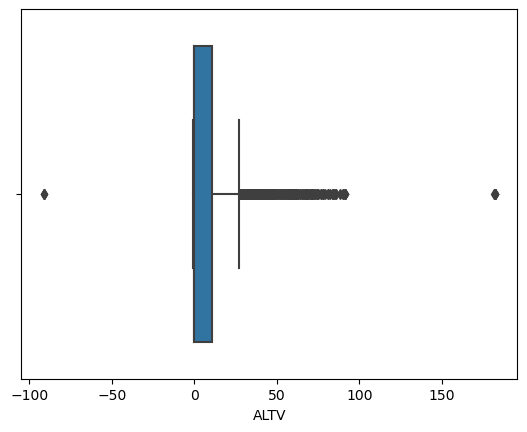

In [34]:
sns.boxplot(x=df1["ALTV"])

In [35]:
# we detected a few outliers using visualisation and IQR method But we will not be treated it 
# we Just know there are otliers in several columns and were keeping them in our dataset for now

# 2.	Statistical Summary:

In [36]:
# Provide a statistical summary for each variable in the dataset, 
# including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [37]:
summary_statistics =df1.describe()
summary_statistics

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [38]:
# InterQuartile range


Q1 = df1.quantile(0.25)   # we get 25th percentile
Q2 = df1.quantile(0.50)   # we get 25th percentile (median)
Q3 = df1.quantile(0.75)   # we get 75th percentile
Q1 , Q2,  Q3

(LB          126.000000
 AC            0.000000
 FM            0.000000
 UC            0.001851
 DL            0.000000
 DS            0.000000
 DP            0.000000
 ASTV         32.000000
 MSTV          0.700000
 ALTV          0.000000
 MLTV          4.600000
 Width        37.000000
 Tendency      0.000000
 NSP           1.000000
 Name: 0.25, dtype: float64,
 LB          133.000000
 AC            0.001668
 FM            0.000000
 UC            0.004484
 DL            0.000000
 DS            0.000000
 DP            0.000000
 ASTV         49.000000
 MSTV          1.200000
 ALTV          0.000000
 MLTV          7.500000
 Width        68.000000
 Tendency      0.000000
 NSP           1.000000
 Name: 0.5, dtype: float64,
 LB          140.000000
 AC            0.005606
 FM            0.002567
 UC            0.006536
 DL            0.003289
 DS            0.000000
 DP            0.000000
 ASTV         61.000000
 MSTV          1.700000
 ALTV         11.000000
 MLTV         10.800000
 Width 

In [39]:
IQR = Q3 - Q1
IQR

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

In [40]:
summary_statistics.loc['IQR'] = IQR
summary_statistics

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000
IQR,14.000000,0.005606,0.002567,0.004685,0.003289,0.000000,0.000000,29.000000,1.000000,11.000000,6.200000,63.000000,1.000000,0.000000


# Findings

In [41]:
# Negative values in variables like DS DP, ALTV, MLTV can indicate A data entry error or a specific medical condition which should be further investigated

In [42]:
# ASTV shows a broad range of values which can be clinically significant

# 3.	Data Visualization:

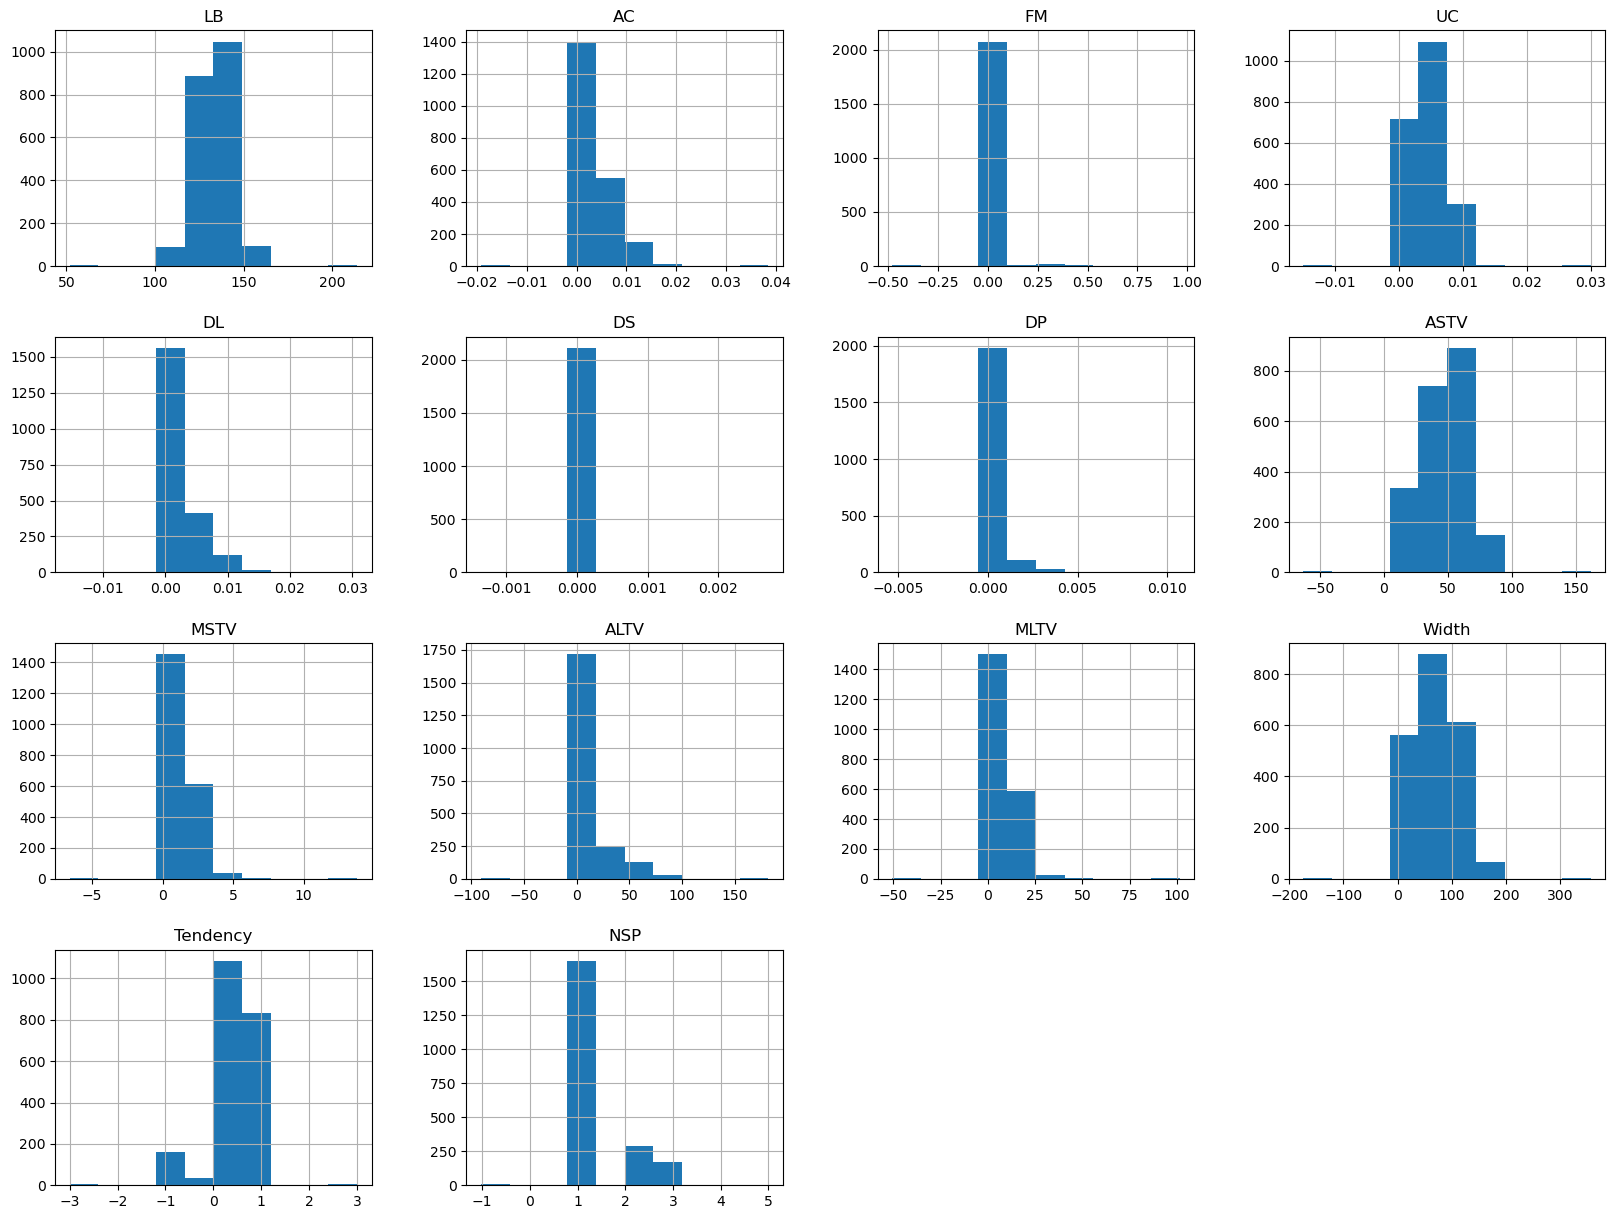

In [43]:
# Create histograms for numerical variables
df1.hist(figsize = (20, 15))  #histogram for every column seperately


plt.show()

# here almost all the columns have a leptokurtic curve

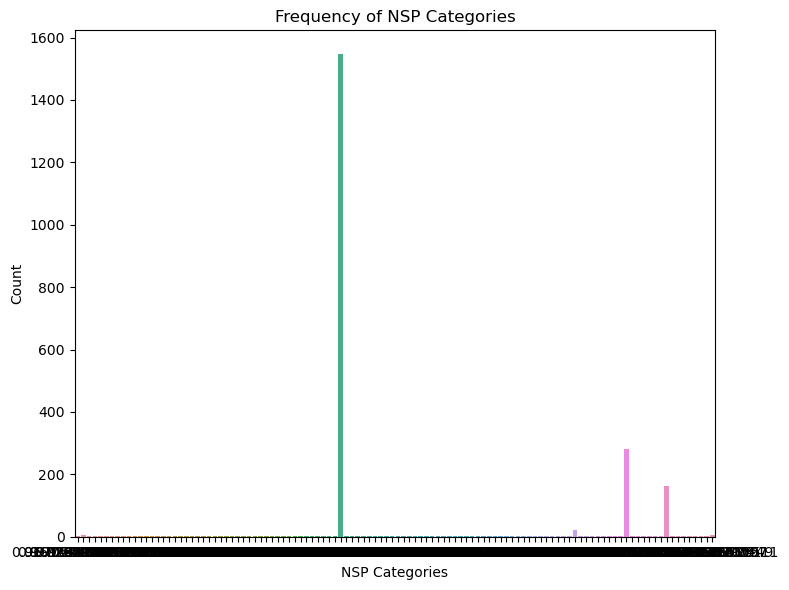

In [44]:
# Bar chart for categorical variable 'NSP'
plt.figure(figsize=(8, 6))
sns.countplot(x='NSP', data=df1)
plt.title('Frequency of NSP Categories')
plt.xlabel('NSP Categories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


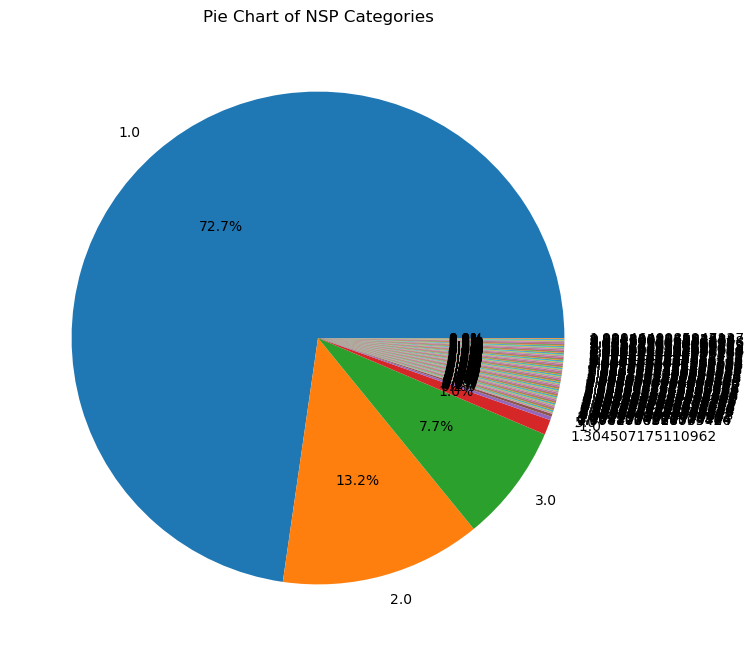

In [45]:
# Pie chart for categorical variable 'NSP'
plt.figure(figsize=(8, 8))
df1['NSP'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of NSP Categories')
plt.ylabel('')
plt.show()

In [46]:
df1['NSP'].value_counts() # its not a categorical variable 

 1.000000    1546
 2.000000     280
 3.000000     164
 1.304507      21
-1.000000       5
             ... 
 0.992847       1
 2.971309       1
 0.984834       1
 0.991200       1
 1.990464       1
Name: NSP, Length: 112, dtype: int64

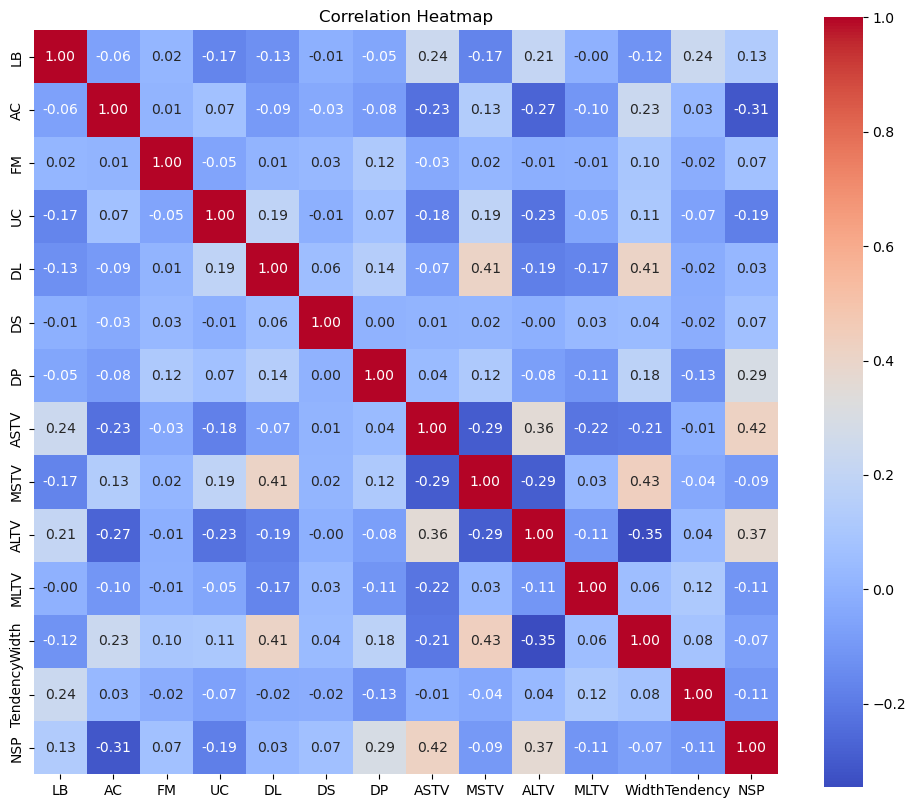

In [47]:
# Scatter plots and correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


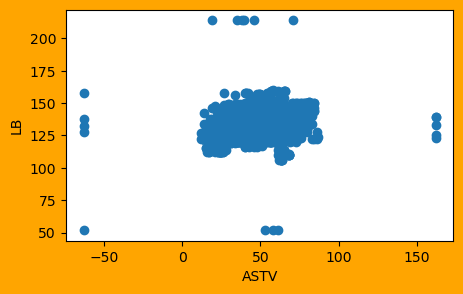

In [48]:
plt.figure(figsize = (5,3), facecolor = 'orange')
plt.scatter(df1['ASTV'] , df1['LB'] )
plt.xlabel('ASTV')
plt.ylabel('LB')
plt.show()

#this scatter shows that there is zero correlation between these two

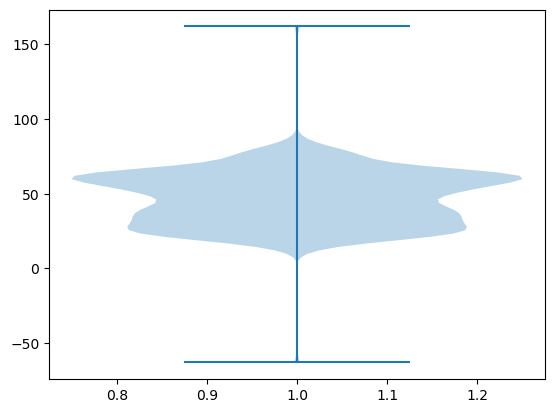

In [49]:
plt.violinplot(df1['ASTV'])
plt.show()

# it has negative values which can be data entry error 
# its more spread out at 60 value i.e at 60 value the density is higher
# we understand the spread of data

# checking Correlation

In [50]:
df1.corr() 

# there is like good correlation between a few variable like ASTV and NSP

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357
